<div class="alert alert-block alert-success">
<b>Overall reviewer's comment. V.5.</b> <a class="tocSkip"></a>
    
Hi Salam! 
    
Now we have correct CAC and ROI. It help us to ask right questions to the marketing department. Project wwas hard and big. You did a lot of job.
    
Congratulations! Your project has been accepted!
    
You're on the right track. Good luck!
    
P.S. Please, use Kernel-Restart&Run All before sending the project. It help us see errors. For example, We have a problem with cell 40.
</div>

<div class="alert alert-block alert-warning">
<b>Overall reviewer's comment. V.5.</b> <a class="tocSkip"></a>
    
Hi Salam! Cells should run automatically. Please, use kernel-restart&run all.  We need a little bit more work with:
    
    
- **[For CAC per source we need:](http://joxi.ru/82QPJZac8oM67m)**

        find first source per user in visits
        find first order month and first order day in orders
        merge tables
        group new table by source id and first order day and count uid
        merge with costs (left using source id and first order day and right using source id and costs day. )
        calculate cac per source
        plot a graph by month per source(standart plot)
    
    
- heatmap for roi is correrct, but below we have an error. Could you check?
    

I asked your tutor for help. Please, wait her message before sending the project.
</div>

<div class="alert alert-block alert-warning">
<b>Overall reviewer's comment. V.4.</b> <a class="tocSkip"></a>
    
Hi Salam! I asked your tutor for help. Please, wait her message before sending the project.
    
    
    
Product
    
**Please, return previous version of this part.**
    
    
    
Sales

- **[How many orders do they make during a given period of time?](http://joxi.ru/RmzJj9wtv4zQ5m).**    
    **Please, use cohort analysis like for retention rate.**
    
        find the number of buyers in each cohort
        group orders by first order month and order_month' and count revenue
        calculate age of each cohort
        add the number of buyers in each cohort to the cohort report
        count the number of orders per customer
        create a table and plot a classical heatmap like for retention rate.
    
    
**[What is the average purchase size?](http://joxi.ru/gmvyM8wTeWV88r)**    
    **No cohort analysis. Only standart chronologically monthly line.**
    
    we need to find mean revenue and plot a graph for mean revenue by month. 
    Also we need to show the value of mean revenue.
    
        
    
Marketing

**How much did customer acquisition from each of the sources cost?**   
    **Divede sum of costs by unique orders for mean cac**
   
   
    
**[For total CAC:](http://joxi.ru/n2YPpe1ckP94Bm)**
   
        group costs by month and sum costs
        group orders by first order month using nunique uid
        merge(indexes are true)
        calculate cac
        plot a graph by month
   
**[For CAC per source we need:](http://joxi.ru/82QPJZac8oM67m)**

        find first source per user in visits
        find first order month and first order day in orders
        merge tables
        group new table by source id and first order day and count uid
        merge with costs (left using source id and first order day and right using source id and costs day. )
        calculate cac per source
        plot a graph by month per source(standart plot)
    
    
[How worthwhile where the investments? (ROI)](http://joxi.ru/Q2KPk56cOP73PA)    
     **Please, use cohort analysis like for retention rate.**
    
    create dataset with first order month for  uids 
    group by first order month and use unique uid.
    merge table with orders 
    group by first order month and order month sum and count revenue
    calculate age
    merge tables on first order month
    add costs and cac
    calculate roi
    plot a classical heatmap like for retention rate.
    


</div>

# Project description
Optimization marketing expenses in Yandex.Afisha

In this project, we work as an intern in the analytical department at Yandex.Afisha. Our task is to help optimize marketing expenses.

Table of Contents
Step 1 Data preprocessing
Step 2 Metric computations and reports
Product analysis
Sales analysis
Marketing analysis
Step 3 Conclusions and recommendations to the marketing department

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime
import seaborn as sns

In [2]:
try:
    visits=pd.read_csv('/datasets/visits_log_us.csv') 
    orders=pd.read_csv('/datasets/orders_log_us.csv')
    costs=pd.read_csv('/datasets/costs_us.csv')
except:
    visits=pd.read_csv('visits_log_us.csv') 
    orders=pd.read_csv('orders_log_us.csv')
    costs=pd.read_csv('costs_us.csv')

In [3]:

visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [4]:
visits.columns = visits.columns.str.replace(" ", "_").str.lower()

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [6]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [7]:
orders.columns=orders.columns.str.replace(" ", "_").str.lower()

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [9]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [11]:
print (visits.duplicated().sum())
print (orders.duplicated().sum())
print (costs.duplicated().sum())

0
0
0


In [12]:
visits.drop_duplicates(inplace=True)
orders.drop_duplicates(inplace=True)
costs.drop_duplicates(inplace=True)

Step 1. Download the data and prepare it for analysis
We have been provided with the following datasets:

/datasets/visits_log_us.csv: Server logs with data on Yandex.Afisha visits from June 2017 through May 2018;
/datasets/orders_log_us.csv: Dump file with all orders for the period;
/datasets/costs_us.csv: Marketing expenses statistics.
We are going to study the following points:

How people use the product;
When they start to buy;
How much money each customer brings;
When they pay off.

Conclusion:
3 data were created (visits, orders, costs).
There are no missing values.
Some of the columns contained date and time and were converted from object to_datetime.
Rewrote column names in lowercase.
No duplicates in the date.

# Make reports and calculate metrics

How many people use it every day, week, and month?

In [13]:
visits['end_ts']=pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M")
visits['start_ts']=pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M")
orders['buy_ts']=pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M")
costs['dt']=pd.to_datetime(costs['dt'], format="%Y-%m-%d %H:%M")

In [14]:
visits['year']  = visits['start_ts'].dt.isocalendar().year
visits['month']  = visits['start_ts'].dt.month
visits['week']  = visits['start_ts'].astype('datetime64[W]')
visits['date']  = visits['start_ts'].dt.date

In [15]:
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,2017-12-21,2017-12-27


In [16]:
total_visits=visits['uid'].count()
total_visits

359400

In [17]:
visits_per_source=visits.groupby('source_id')['uid'].count().reset_index().sort_values(by='uid', ascending=False)
visits_per_source['%']=round(visits_per_source['uid']/total_visits*100,2)
visits_per_source

,source_id,uid,%
3,4,101794,28.32
2,3,85610,23.82
4,5,66905,18.62
1,2,47626,13.25
0,1,34121,9.49
7,9,13277,3.69
8,10,10025,2.79
6,7,36,0.01
5,6,6,0.00


In [18]:
visits_per_device=visits.groupby('device')['uid'].count().reset_index().sort_values(by='uid', ascending=False)
visits_per_device['%']=round(visits_per_device['uid']/total_visits*100,2)
visits_per_device

,device,uid,%
0,desktop,262567,73.06
1,touch,96833,26.94


In [19]:
visits_per_source_device=visits.groupby(['source_id','device'])['uid'].count().reset_index()
visits_per_source_device_piv=visits_per_source_device.pivot_table(index='source_id', columns='device', values='uid').reset_index()
visits_per_source_device_piv

device,source_id,desktop,touch
0,1,25901,8220
1,2,35661,11965
2,3,65777,19833
3,4,67640,34154
4,5,50069,16836
5,6,5,1
6,7,28,8
7,9,10119,3158
8,10,7367,2658


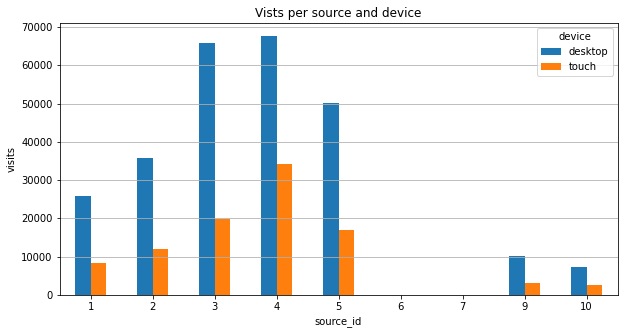

In [20]:
fig, axs = plt.subplots(figsize=(10, 5))
visits_per_source_device_piv.plot(rot=0, x='source_id',
        kind='bar',
        stacked=False,
        title='Vists per source and device', ax=axs, ylabel='visits')
plt.grid(axis='y')
plt.show()

In [21]:
total_visitors=visits['uid'].nunique()
total_visitors

228169

In [22]:
first_visit_source=visits.sort_values('start_ts').groupby('uid').first()[['source_id','device']].reset_index()
first_visit_source.head()

,uid,source_id,device
0,11863502262781,3,touch
1,49537067089222,2,touch
2,297729379853735,3,desktop
3,313578113262317,2,desktop
4,325320750514679,5,desktop


In [23]:
visitors_per_source=first_visit_source.groupby('source_id')['uid'].nunique().reset_index().sort_values(by='uid', ascending=False)
visitors_per_source['%']=round(visitors_per_source['uid']/total_visitors*100,2)
visitors_per_source

,source_id,uid,%
3,4,72346,31.71
2,3,66116,28.98
4,5,49237,21.58
1,2,17616,7.72
0,1,9469,4.15
8,10,6903,3.03
7,9,6448,2.83
6,7,32,0.01
5,6,2,0.00


In [24]:
visitors_per_device=first_visit_source.groupby('device')['uid'].nunique().reset_index().sort_values(by='uid', ascending=False)
visitors_per_device['%']=round(visitors_per_device['uid']/total_visitors*100,2)
visitors_per_device

,device,uid,%
0,desktop,160795,70.47
1,touch,67374,29.53


In [25]:
visitors_per_source_device=first_visit_source.groupby(['source_id','device'])['uid'].nunique().reset_index()
visitors_per_source_device_piv=visitors_per_source_device.pivot_table(index='source_id', columns='device', values='uid').reset_index()
visitors_per_source_device_piv

device,source_id,desktop,touch
0,1,6347.0,3122.0
1,2,11771.0,5845.0
2,3,50190.0,15926.0
3,4,46965.0,25381.0
4,5,35822.0,13415.0
5,6,2.0,NaN
6,7,24.0,8.0
7,9,4828.0,1620.0
8,10,4846.0,2057.0


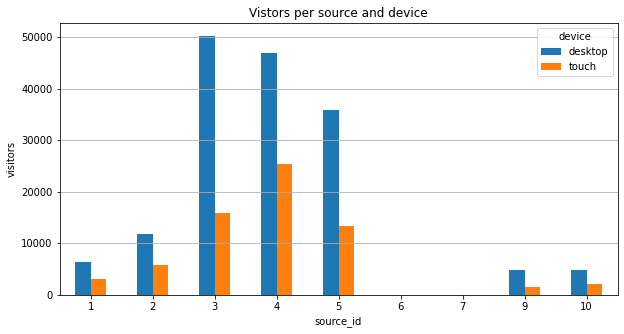

In [26]:
fig, axs = plt.subplots(figsize=(10, 5))
visitors_per_source_device_piv.plot(rot=0, x='source_id',
        kind='bar',
        stacked=False,
        title='Vistors per source and device', ax=axs, ylabel='visitors')
plt.grid(axis='y')
plt.show()

In [27]:
dau = visits.groupby('date')['uid'].nunique().reset_index()
dau.head()

,date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


In [28]:
dau_av=int(dau.mean())
dau_av

907

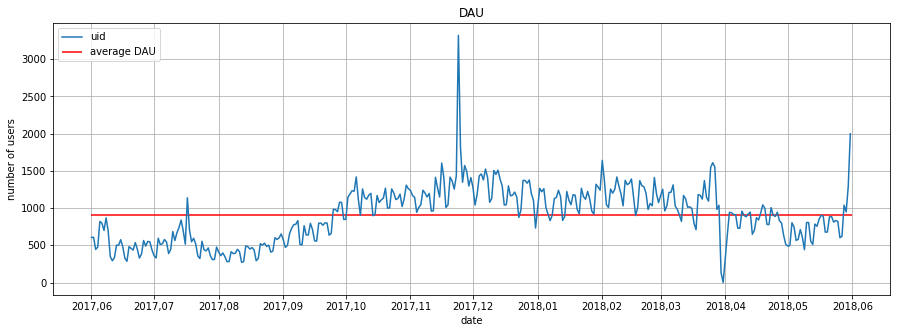

In [29]:
fig, axs = plt.subplots(figsize=(15, 5))
fig = dau.plot(kind='line', x="date", y="uid", title='DAU', x_compat=True, grid='True', ax=axs, ylabel='number of users')
dtFmt = mdates.DateFormatter('%Y,%m') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # show every 12th tick on x axes
plt.hlines(dau_av, '2017-06-01', '2018-06-01', color='red', label= 'average DAU')
plt.legend(loc = 'upper left')
plt.show(close='All')

In [30]:
wau = visits.groupby('week')['uid'].nunique().reset_index()
wau.head()

,week,uid
0,2017-06-01,4082
1,2017-06-08,3311
2,2017-06-15,2844
3,2017-06-22,3079
4,2017-06-29,3055


In [31]:
wau_av=int(wau['uid'].mean())
wau_av

5724

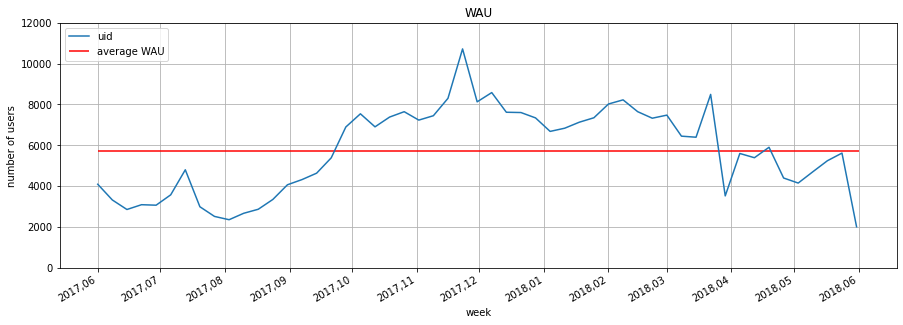

In [32]:
fig, axs = plt.subplots(figsize=(15, 5))
fig = wau.plot(kind='line', x="week", y="uid", title='WAU', x_compat=True, grid='True', ax=axs,
               ylabel='number of users')
dtFmt = mdates.DateFormatter('%Y,%m') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # show every 12th tick on x axes
plt.ylim((0,12000))
plt.hlines(wau_av, '2017-06-01', '2018-06-01', color='red', label= 'average WAU')
plt.legend(loc = 'upper left')
plt.show(close='All')

In [33]:
mau = visits.groupby(['year', 'month']).agg({'uid': 'nunique'}).reset_index()
mau

,year,month,uid
0,2017,6,13259
1,2017,7,14183
2,2017,8,11631
3,2017,9,18975
4,2017,10,29692
5,2017,11,32797
6,2017,12,31557
7,2018,1,28716
8,2018,2,28749
9,2018,3,27473


In [34]:
mau_av=int(mau['uid'].mean())
mau_av

23228

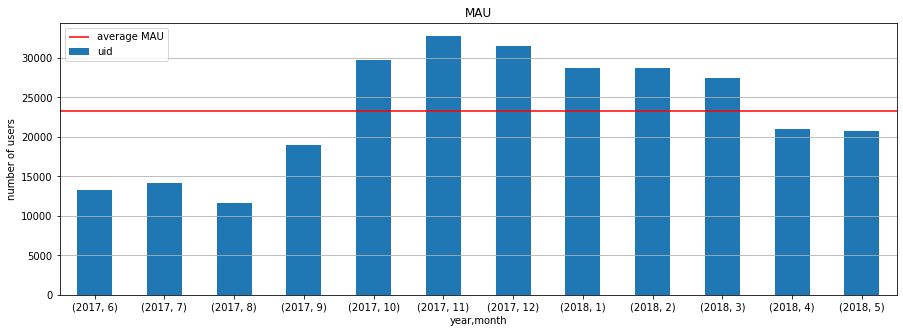

In [35]:
mau = visits.groupby(['year', 'month']).agg({'uid': 'nunique'})
mau.plot.bar(rot=0, figsize=(15, 5))
plt.hlines(mau_av, -1, 12, color='red', label= 'average MAU')
plt.legend(loc = 'upper left')
plt.title('MAU')
plt.ylabel('number of users')
plt.grid(axis='y')
plt.show()

In general, on average 907 people use it daily, 5716 people use it weekly, and 23228 people use it monthly. If we look at various devices, we see that percentage of desktop users is significantly higher than that of touch device users. As for various ad sources - 29% of daily active users come from source 4, 24.5% come from source 3, 18.5% come from source 5, and 12.7% come from source 2. Alltogether these four ad sources bring us lamost 85%% of daily active users. We see pretty much the same picture on graphs for weekly active users and monthly active users, so we can assume that source 4 is the most active, then go sources 3, 5, and 2.

How many sessions are there per day? (One user might have more than one session.)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment. V.4.</b> <a class="tocSkip"></a>
    
Where is a monthly in a chronologically for order sessions_per_user? Please, return it.</div>

In [36]:
visits_daily=visits.groupby('date').agg({'uid': ['count', 'nunique']}).reset_index()
visits_daily.columns = ['date', 'n_visits', 'n_users']
visits_daily['visits_per_user'] = (visits_daily['n_visits'] / visits_daily['n_users'])

visits_daily.head()


,date,n_visits,n_users,visits_per_user
0,2017-06-01,664,605,1.097521
1,2017-06-02,658,608,1.082237
2,2017-06-03,477,445,1.071910
3,2017-06-04,510,476,1.071429
4,2017-06-05,893,820,1.089024


In [37]:
visits_av = visits_daily['n_visits'].mean()
visits_per_user = (visits_daily['n_visits'].sum() / visits_daily['n_users'].sum())
round(visits_av)
round(visits_per_user,2)

1.09

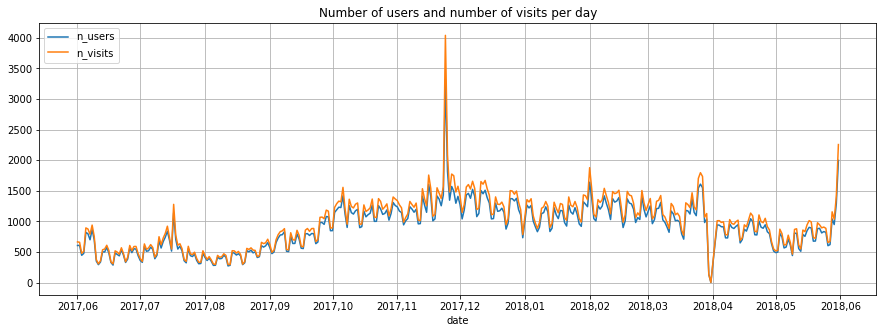

In [38]:
fig, axs = plt.subplots(figsize=(15, 5))
visits_daily.plot(kind='line', x="date", y="n_users", title='DAU', x_compat=True, grid='True', ax=axs)
visits_daily.plot(kind='line', x="date", y="n_visits", title='users', x_compat=True, grid='True', ax=axs)
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # show every 12th tick on x axes
plt.legend(loc = 'upper left')
plt.title('Number of users and number of visits per day')
plt.show(close='All')

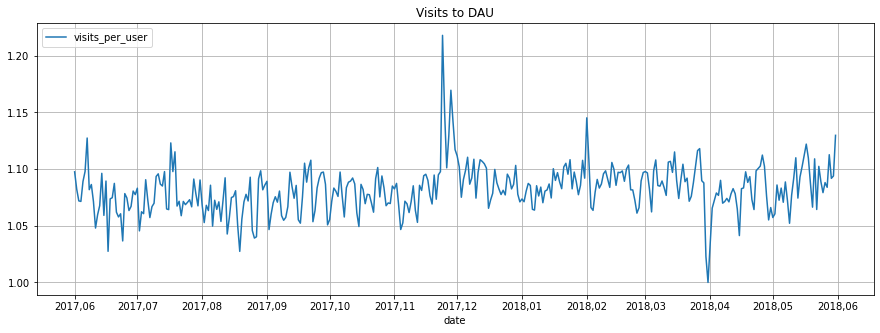

In [39]:
fig, axs = plt.subplots(figsize=(15, 5))
visits_daily.plot(kind='line', x="date", y="visits_per_user", title='visits to DAU', x_compat=True, grid='True', ax=axs)
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # show every 12th tick on x axes
plt.legend(loc = 'upper left')
plt.title('Visits to DAU')
plt.show(close='All')

On average, there are 987 sessions per day. In terms of sessions per user - number varies from 1 to 1.16, which is pretty stable for various devices and various ad sources.

What is the length of each session?

In [40]:
visits['length'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
duration_av=round(visits['length'].mean(),2)
print(F'Average duration of visit in seconds (mean): {duration_av}')

Average duration of visit in seconds (mean): 643.51


In [41]:
visits['length'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: length, dtype: float64

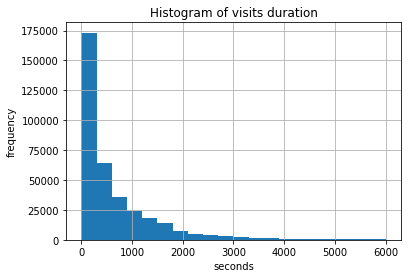

In [42]:
visits['length'].hist(bins=20,range=(0,6000))
plt.title('Histogram of visits duration')
plt.ylabel('frequency')
plt.xlabel('seconds')
plt.show()

In [43]:
asl_mode=int(visits['length'].mode())
asl_mode
asl_mode_desktop=int(visits.query('device == "desktop"')['length'].mode())
asl_mode_desktop
asl_mode_touch=int(visits.query('device == "touch"')['length'].mode())
asl_mode_touch

60

In [44]:
asl_median=int(visits['length'].median())
asl_median
asl_median_desktop=int(visits.query('device == "desktop"')['length'].median())
asl_median_desktop
asl_median_touch=int(visits.query('device == "touch"')['length'].median())
asl_median_touch

180

In [45]:
visit_length=visits.groupby('date').agg({'uid': 'count', 'length': 'mean'}).reset_index()
visit_length.columns = ['date', 'n_visits', 'asl']
visit_length.head()

,date,n_visits,asl
0,2017-06-01,664,666.320783
1,2017-06-02,658,619.840426
2,2017-06-03,477,606.958071
3,2017-06-04,510,554.309804
4,2017-06-05,893,624.450168


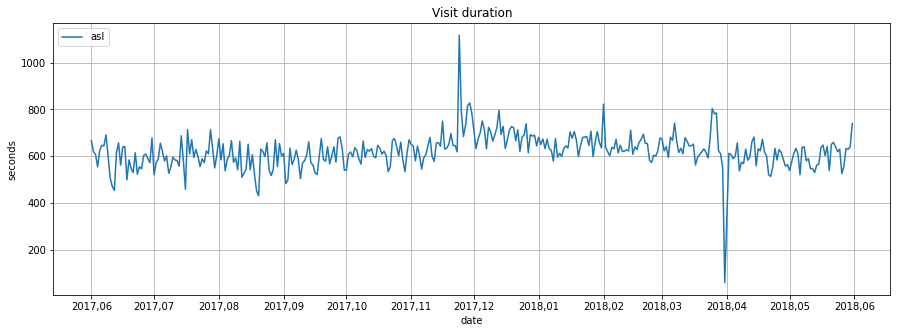

In [46]:
fig, axs = plt.subplots(figsize=(15, 5))
fig = visit_length.plot(kind='line', x="date", y="asl", title='Visit duration', grid='True', ax=axs, ylabel='seconds')
dtFmt = mdates.DateFormatter('%Y,%m') 
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.legend(loc = 'upper left')
plt.show(close='All')

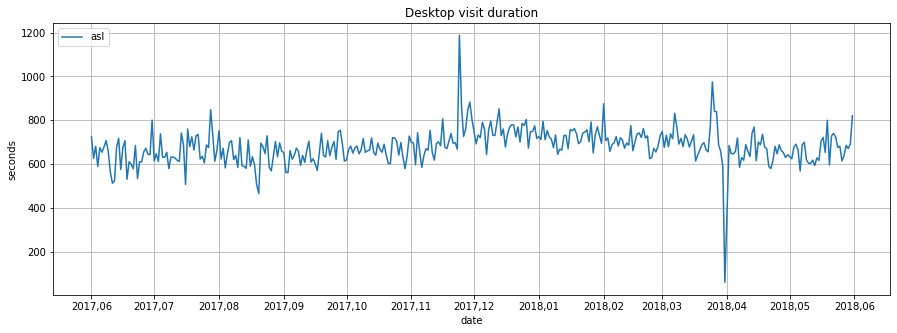

In [47]:
visits_desk=visits.query('device == "desktop"')
visit_length_desk=visits_desk.groupby('date').agg({'uid': 'count', 'length': 'mean'}).reset_index()
visit_length_desk.columns = ['date', 'n_visits', 'asl']
fig, axs = plt.subplots(figsize=(15, 5))
fig = visit_length_desk.plot(kind='line', x="date", y="asl", title='Desktop visit duration', grid='True', ax=axs, ylabel='seconds')
dtFmt = mdates.DateFormatter('%Y,%m') 
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
plt.legend(loc = 'upper left')
plt.show(close='All')

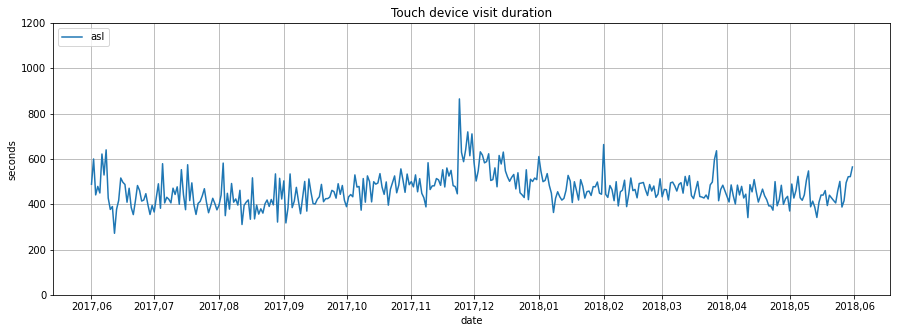

In [48]:
visits_touch=visits.query('device == "touch"')
visit_length_touch=visits_touch.groupby('date').agg({'uid': 'count', 'length': 'mean'}).reset_index()
visit_length_touch.columns = ['date', 'n_visits', 'asl']
fig, axs = plt.subplots(figsize=(15, 5))
fig = visit_length_touch.plot(kind='line', x="date", y="asl", title='Touch device visit duration', grid='True', ax=axs, ylabel='seconds')
plt.ylim((0,1200))
dtFmt = mdates.DateFormatter('%Y,%m') 
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
plt.legend(loc = 'upper left')
plt.show(close='All')

How often do users come back?

In [49]:
first_visit = visits.groupby(['uid'])['date'].min().reset_index()
first_visit.columns = ['uid', 'first_visit']
first_visit.head()

,uid,first_visit
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30


In [50]:
visits = visits.merge(first_visit, how='inner',on=['uid'])

In [51]:
visits['cohort']=visits['first_visit'].astype('datetime64[M]')
visits['age'] = ((visits['date'].astype('datetime64[M]') - visits['first_visit'].astype('datetime64[M]')) / np.timedelta64(1,'M')).round().astype('int')
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,date,length,first_visit,cohort,age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,2017-12-14,2017-12-20,1080,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,2018-02-15,2018-02-19,1680,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,2017-06-29,2017-07-01,0,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,2018-05-17,2018-05-20,1440,2018-03-09,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,2018-03-08,2018-03-09,1680,2018-03-09,2018-03-01,0


In [52]:
cohorts_visits = visits.pivot_table(index='cohort',
                  columns='age',
                  values='uid',
                  aggfunc='nunique')

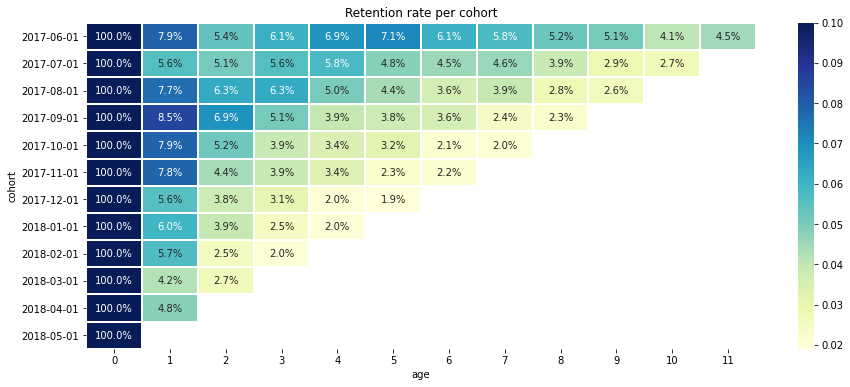

In [53]:
retention=cohorts_visits.iloc[:,0:].div(cohorts_visits[0], axis=0)
retention.index=retention.index.astype(str)

f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='white', cmap="YlGnBu", vmax=0.1).set(title = 'Retention rate per cohort')
plt.show()

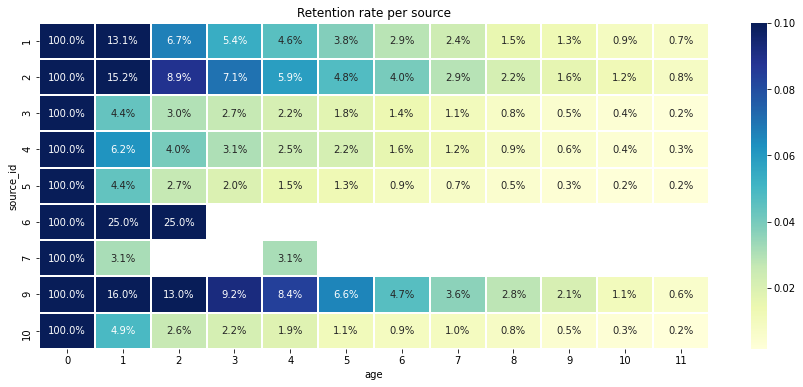

In [54]:
sources_visits = visits.pivot_table(index='source_id',
                  columns='age',
                  values='uid',
                  aggfunc='nunique')
sources_visits
retention_source =sources_visits.iloc[:,0:].div(sources_visits[0], axis=0)
retention_source.index=retention_source.index.astype(str)
retention_source
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(retention_source, annot=True, fmt='.1%', linewidths=1, linecolor='white', cmap="YlGnBu", vmax=0.1).set(title = 'Retention rate per source')
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment. V.4.</b> <a class="tocSkip"></a>
    
Please, retun previous version of Retention. It  was correct.</div>

What can we say about the retention rate? If we look at various devices, we see that retention rate is little bit higher for desktop users. Now let's take a look on various ad sources. Sources number 6 and 7 are not very informative due to very low number of initial users (5 and 33), so retention rate here is not very representative. We also see that there are sources 3, 4, 5, and 10 with pretty close retention rates (15-20% for 1d, 9-13% for 30d), while sources 1, 2, and 9 have significantly higher retention rates (37-44% for 1d, 19-33% for 30d). All in all, ad source 9 seems to have the highest retention rate.

# Sales
When do people start buying?

In [55]:
first_order = orders.groupby(['uid'])['buy_ts'].min().reset_index()
first_order.columns = ['uid', 'first_order']

In [56]:
visits=visits.merge(first_order, how='left',on=['uid'])

In [57]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   device                359400 non-null  object        
 1   end_ts                359400 non-null  datetime64[ns]
 2   source_id             359400 non-null  int64         
 3   start_ts              359400 non-null  datetime64[ns]
 4   uid                   359400 non-null  uint64        
 5   year                  359400 non-null  UInt32        
 6   month                 359400 non-null  int64         
 7   week                  359400 non-null  datetime64[ns]
 8   date                  359400 non-null  object        
 9   session_duration_sec  359400 non-null  int64         
 10  first_visit           359400 non-null  object        
 11  cohort                359400 non-null  datetime64[ns]
 12  age                   359400 non-null  int64         
 13 

In [58]:
customers=visits.dropna()
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97394 entries, 3 to 359397
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   device                97394 non-null  object        
 1   end_ts                97394 non-null  datetime64[ns]
 2   source_id             97394 non-null  int64         
 3   start_ts              97394 non-null  datetime64[ns]
 4   uid                   97394 non-null  uint64        
 5   year                  97394 non-null  UInt32        
 6   month                 97394 non-null  int64         
 7   week                  97394 non-null  datetime64[ns]
 8   date                  97394 non-null  object        
 9   session_duration_sec  97394 non-null  int64         
 10  first_visit           97394 non-null  object        
 11  cohort                97394 non-null  datetime64[ns]
 12  age                   97394 non-null  int64         
 13  first_order    

In [59]:
pd.options.mode.chained_assignment = None 

In [60]:
customers['conversion']=((pd.to_datetime(customers['first_order'])-pd.to_datetime(customers['first_visit']))/np.timedelta64(1,'D')).astype('int')
customers.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,date,session_duration_sec,first_visit,cohort,age,first_order,conversion
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,2018-05-17,2018-05-20,1440,2018-03-09,2018-03-01,2,2018-03-09 20:25:00,0
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,2018-03-08,2018-03-09,1680,2018-03-09,2018-03-01,0,2018-03-09 20:25:00,0
6,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,2017-08-31,2017-09-03,60,2017-09-03,2017-09-01,0,2017-09-04 12:46:00,1
7,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017,10,2017-10-26,2017-10-27,2520,2017-09-03,2017-09-01,1,2017-09-04 12:46:00,1
8,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017,9,2017-08-31,2017-09-04,1140,2017-09-03,2017-09-01,0,2017-09-04 12:46:00,1


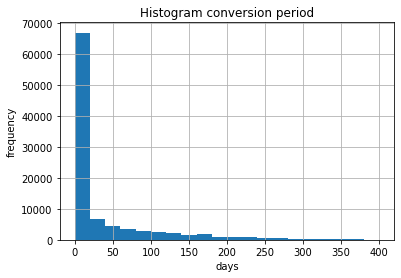

In [61]:
customers['conversion'].hist(bins=20,range=(0,400))
plt.title('Histogram conversion period')
plt.ylabel('frequency')
plt.xlabel('days')
plt.show()

In [62]:

customers['conversion'].describe()

count    97394.000000
mean        33.713750
std         63.348208
min          0.000000
25%          0.000000
50%          1.000000
75%         37.000000
max        363.000000
Name: conversion, dtype: float64

In [63]:
conversion_mode=int(customers['conversion'].mode())
conversion_mode

0

In [64]:
conversion_rate=customers['uid'].nunique()/visits['uid'].nunique()
conversion_rate

0.16006994815246595

In [65]:
first_source=visits.sort_values('start_ts').groupby('uid').first()['source_id'].reset_index()
first_source.columns=['uid','first_source']

In [66]:
orders=orders.merge(first_source,on=['uid'],how='left')

In [67]:
conversion_per_source=orders.groupby('first_source')['uid'].nunique().reset_index()
conversion_per_source.columns=['source_id', 'orders']

In [68]:
conversion_per_source=conversion_per_source.merge(visitors_per_source, how='left', on='source_id')
conversion_per_source.drop(columns = ['%'],axis = 1, inplace=True)
conversion_per_source['conv_rate, %']=round(conversion_per_source['orders']/conversion_per_source['uid']*100,2)
conversion_per_source

,source_id,orders,uid,"conv_rate, %"
0,1,2899,9469,30.62
1,2,3506,17616,19.90
2,3,10473,66116,15.84
3,4,10296,72346,14.23
4,5,6931,49237,14.08
5,7,1,32,3.12
6,9,1088,6448,16.87
7,10,1329,6903,19.25


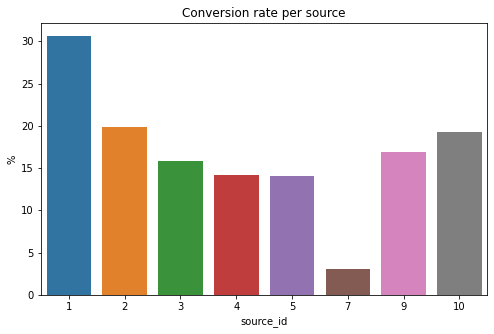

In [69]:
fig, axs = plt.subplots(figsize=(8, 5))
sns.barplot(data=conversion_per_source[['source_id', 'conv_rate, %']], x='source_id', y='conv_rate, %')
plt.title('Conversion rate per source')
plt.ylabel('%')
plt.show()

We see that most of the users (almost all of them) convert the same day they first visit the app. If we check conversion for various devices and ad sources, we see the same tendency everywhere.

How many orders do they make during a given period of time?    

We'll check the number of monthly orders, since we have data for a year. If we take a look at number of orders from various devices, we see that the number of orders from touch users is small relatively to that of desktop users. What about various ad sources? The biggest number of orders comes from source 4, then goes source 3, source 2, source 5, and source 1. Sources 7, 9, and 10 have non-significant number of orders relatively to other sources

# What is the average purchase size?

In [70]:
total_orders=orders['uid'].count()
total_orders

50415

In [71]:
orders_per_customer=round(orders['uid'].count()/orders['uid'].nunique(),2)
orders_per_customer

1.38

In [72]:
orders['order_month']  = orders['buy_ts'].astype('datetime64[M]')

In [73]:
first_order['first_order']=first_order['first_order'].astype('datetime64[M]')
orders=orders.merge(first_order, how='left',on=['uid'])

In [74]:
cohort_orders = orders.groupby('first_order').agg({'uid': 'nunique'}).reset_index()
cohort_orders.columns=['first_order','cohort_size']

In [75]:
cohorts_customers=orders.groupby(['first_order','order_month'])['revenue'].count().reset_index()
cohorts_customers.columns=['first_order','order_month','orders']
cohorts_customers=cohorts_customers.merge(cohort_orders,on=['first_order'])
cohorts_customers['age_month'] = ((cohorts_customers['order_month'] - cohorts_customers['first_order']) / np.timedelta64(1,'M')).round().astype('int')
visits.head()
cohorts_customers['orders_per_customer']=cohorts_customers['orders']/cohorts_customers['cohort_size']

In [76]:
cohorts_customers_piv=cohorts_customers.pivot_table(
    index='first_order', 
    columns='age_month', 
    values='orders_per_customer', 
    aggfunc='sum').cumsum(axis=1)

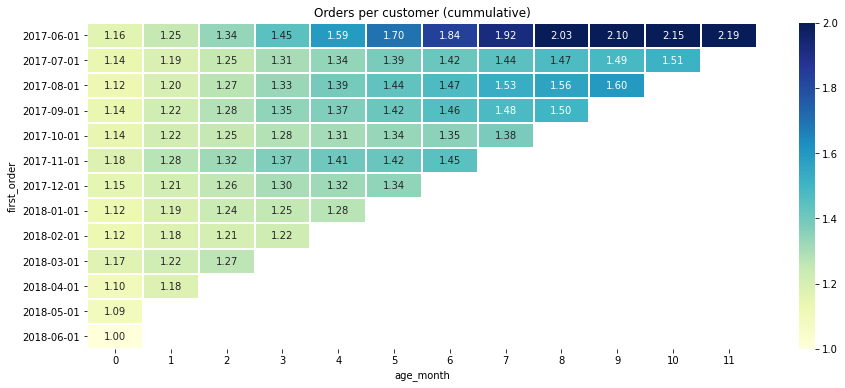

In [77]:
cohorts_customers_piv.index=cohorts_customers_piv.index.astype(str)
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(cohorts_customers_piv, annot=True, fmt='.2f', linewidths=1, linecolor='white', vmax=2, cmap="YlGnBu"
            ).set(title ='Orders per customer (cummulative)')
plt.show()

In [78]:
total_revenue=round(orders['revenue'].sum())
total_revenue

252057

In [79]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

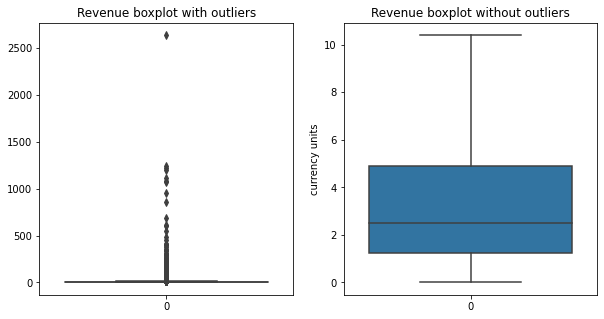

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data=orders['revenue'], showfliers=True, ax=axes[0]).set(title='Revenue boxplot with outliers')
sns.boxplot(data=orders['revenue'], showfliers=False, ax=axes[1]).set(title='Revenue boxplot without outliers')
sns.set_style("whitegrid")
plt.ylabel('currency units')
plt.show()

In [81]:
orders.query('revenue == 0')['uid'].count()

51

In [82]:
Q1 = orders['revenue'].quantile(0.25)
Q3 = orders['revenue'].quantile(0.75)
IQR = Q3 - Q1
max_iqr=Q3+1.5*IQR
print(F'Maximum border to determine outliers: {max_iqr}')

Maximum border to determine outliers: 10.395


In [83]:
print('Total number of outlier orders: {}'.format(orders.query('revenue > 10.395')['uid'].count()))
print('Total revenue for outlier orders: {}'.format(orders.query('revenue > 10.395')['revenue'].sum()))
print('Share of outlier orders revenue in total revenue: {:.1%}'.format(orders.query('revenue > 10.395')['revenue'].sum()
                                                                   /total_revenue))

Total number of outlier orders: 3990
Total revenue for outlier orders: 111986.97
Share of outlier orders revenue in total revenue: 44.4%


In [84]:
orders['order_date']=orders['buy_ts'].dt.date

In [85]:
orders_av=orders.groupby('order_date')['revenue'].mean().reset_index()

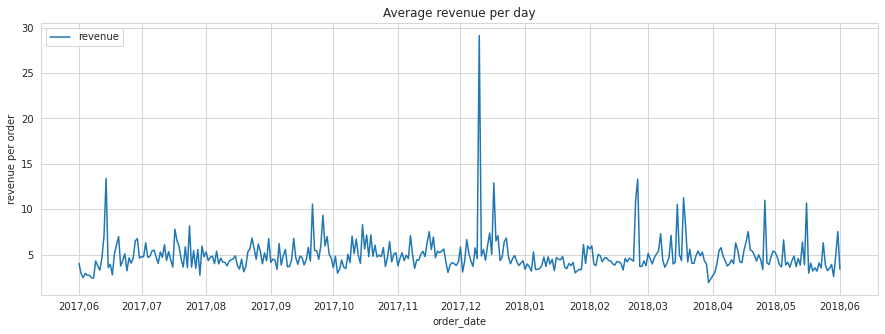

In [86]:
fig, axs = plt.subplots(figsize=(15, 5))
fig = orders_av.plot(kind='line', x="order_date", y="revenue", title='Average revenue per day', x_compat=True, grid='True', ax=axs, ylabel='revenue per order')
dtFmt = mdates.DateFormatter('%Y,%m') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # show every 12th tick on x axes
plt.legend(loc = 'upper left')
plt.show(close='All')

In [87]:
revenue_per_order=round(orders['revenue'].mean(),2)
revenue_per_order

5.0

In [88]:
cohorts_revenue=orders.groupby(['first_order','order_month'])['revenue'].mean().reset_index()
cohorts_revenue['age_month'] = ((cohorts_revenue['order_month'] - cohorts_revenue['first_order']) / np.timedelta64(1,'M')).round().astype(int)
cohorts_revenue.head()

,first_order,order_month,revenue,age_month
0,2017-06-01,2017-06-01,4.060106,0
1,2017-06-01,2017-07-01,5.547006,1
2,2017-06-01,2017-08-01,5.088161,2
3,2017-06-01,2017-09-01,8.545575,3
4,2017-06-01,2017-10-01,7.084178,4


In [89]:
cohorts_revenue_piv=cohorts_revenue.pivot_table(
    index='first_order', 
    columns='age_month', 
    values='revenue', 
    aggfunc='mean')

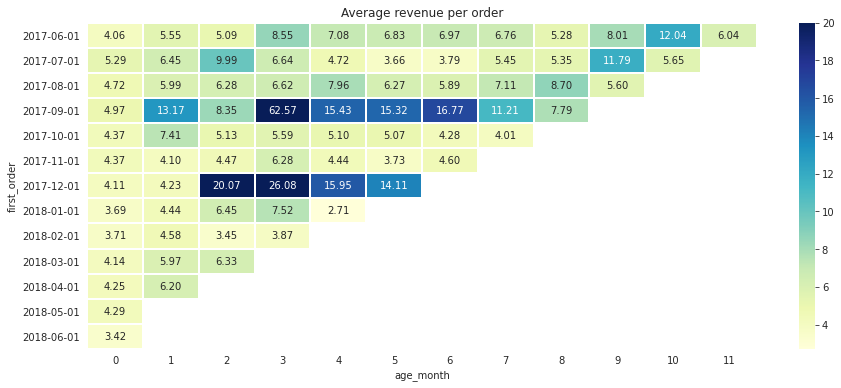

In [90]:
cohorts_revenue_piv.index=cohorts_revenue_piv.index.astype(str)
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(cohorts_revenue_piv, annot=True, fmt='.2f', linewidths=1, linecolor='white', vmax=20, cmap="YlGnBu"
            ).set(title ='Average revenue per order')
plt.show()

If we take a look at the number of orders people make, we see that this number is very high in the 0th lifetime month, from 1533 to 5052 orders, which gives us 1.1 - 1.2 orders per user. In the 1st lifetime month, number of orders significantly decreases to 100 - 397 orders, which is 0.05 - 0.097 orders per user. With every lifetime month, the average number of orders slowly decreases, although in some of the cohorts we see increases on 4th/5th/6th/7th lifetime month.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Yep! 4,99 is a correct average check!
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Could you plot a monthly graph in a chronologically order for mean revenue? 
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>
    
We need simple monthly plot for revenue.mean(). It show us dynamics.

</div>

First of all, from both graphs we see that there are two outstanding months - Septemberand December. Average revenue in these months is significantly bigger, than in others. Exept for these two months, where average revenue from desktop users is higher than that of touch users, average revenue from various devices is pretty close, although for desktop users average revenue is slightly higher. As for various ad sources - source 1 leading almost in every month exept for September and December, where we see huge peaks in average revenue from source 2. Other sources have lower average revenue, but not significantly.

How much money do they bring? (LTV)

In [91]:
cohorts_ltv=orders.groupby(['first_order','order_month'])['revenue'].sum().reset_index()
cohorts_ltv.columns = ['first_order','order_month','revenue']
cohorts_ltv=cohorts_ltv.merge(cohort_orders,on=['first_order'])
cohorts_ltv['age']=((cohorts_ltv['order_month'] - cohorts_ltv['first_order']) / np.timedelta64(1,'M')).round()
cohorts_ltv['ltv']=cohorts_ltv['revenue']/cohorts_ltv['cohort_size']

In [92]:
cohorts_ltv

,first_order,order_month,revenue,cohort_size,age,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4.0,1.022531
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533,2.0,0.315559
75,2018-04-01,2018-04-01,10600.69,2276,0.0,4.657597
76,2018-04-01,2018-05-01,1209.92,2276,1.0,0.531599
77,2018-05-01,2018-05-01,13925.76,2988,0.0,4.660562


In [93]:
cohorts_ltv_piv=cohorts_ltv.pivot_table(
    index='first_order', 
    columns='age', 
    values='ltv', 
    aggfunc='sum').cumsum(axis=1)

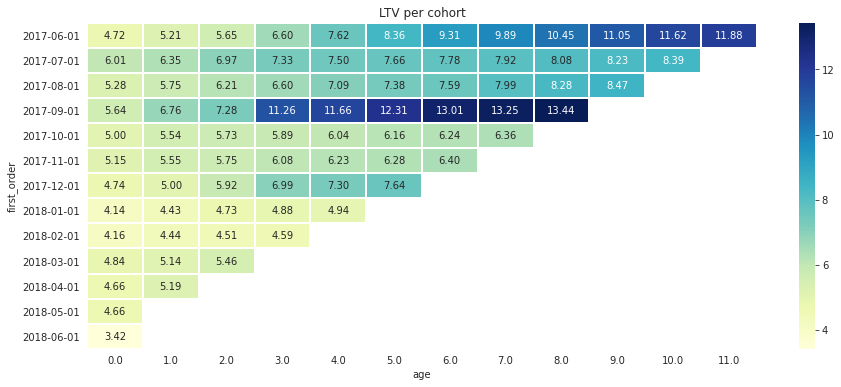

In [94]:
cohorts_ltv_piv.index=cohorts_ltv_piv.index.astype(str)
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(cohorts_ltv_piv, annot=True, fmt='.2f', linewidths=1, linecolor='white', cmap="YlGnBu"
            ).set(title ='LTV per cohort')
plt.show()

In [95]:
revenue_per_customer=round(total_revenue/customers['uid'].nunique(),2)
revenue_per_customer

6.9

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.4.</b> <a class="tocSkip"></a>
    
Yep! LTV is correct! 
</div>

We see that after 0th lifetime months the LTV increases slowly, with average LTV for first three months being 5.82, average LTV for first six month of 7.97, and average LTV for the ninth month of 10.06

# Marketing

How much money was spent? Overall/per source/over time

In [96]:
total_costs=round(costs['costs'].sum())
total_costs

329132

In [97]:
costs_per_source=costs.groupby('source_id')['costs'].sum().reset_index()
costs_per_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


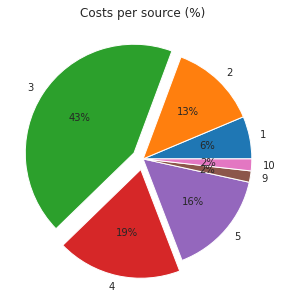

In [98]:
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0, 0.1, 0.1, 0, 0, 0)
ax.pie(costs_per_source['costs'], explode=explode, labels = costs_per_source['source_id'], autopct='%.0f%%')
ax.set_title('Costs per source (%)')
plt.show()

In [99]:
costs['month']=costs['dt'].astype('datetime64[M]')

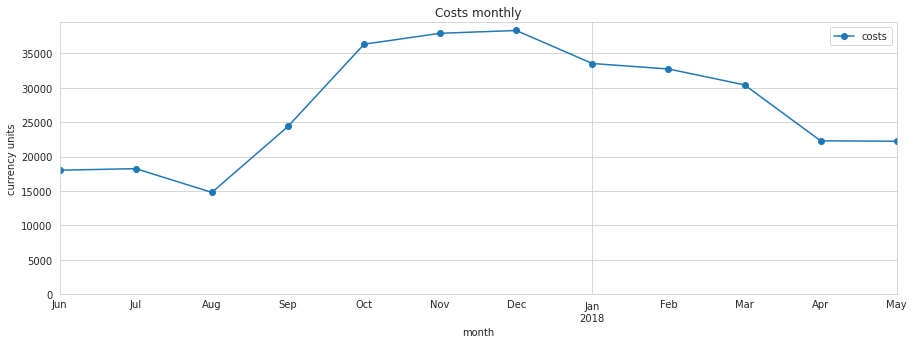

In [100]:
costs_monthly_total=costs.pivot_table(index='month',values='costs', aggfunc='sum')
fig, axs = plt.subplots(figsize=(15, 5))
costs_monthly_total.plot.line(rot=0, ax=axs, title='Costs monthly', ylabel='currency units', xlabel='month', marker="o")
plt.ylim(0)
plt.show()

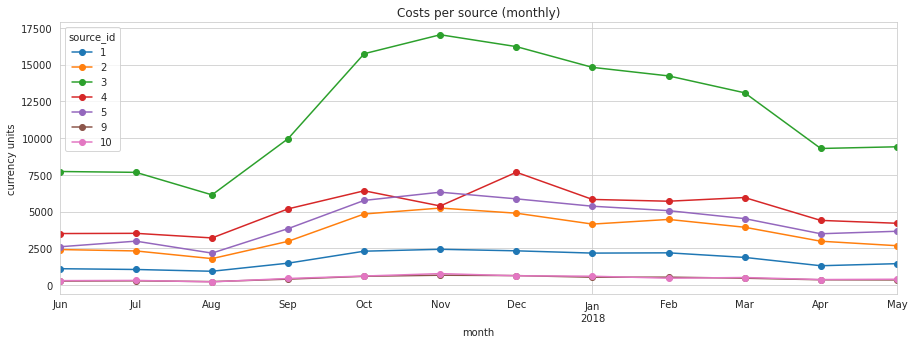

In [101]:
costs_monthly=costs.pivot_table(index='month',columns='source_id',values='costs', aggfunc='sum')
fig, axs = plt.subplots(figsize=(15, 5))
costs_monthly.plot.line(rot=0, ax=axs, title='Costs per source (monthly)', ylabel='currency units', xlabel='month', marker="o")
plt.show()

The picture is pretty clear - company spends a lot on marketing expenses for source 3, significantly more than on other sources. Then we have sources 2, 4, and 5 with similar costs, 1 with lower expences, and 9 and 10 with very low expenses. Overall we can say that the company spends way less money on marketing in summer, little bit more in September, April and May, and the biggest expences we see from October to March.

How much did customer acquisition from each of the sources cost?

In [102]:
cohort_orders.head()

,first_order,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [103]:
costs_per_month=costs.groupby('month')['costs'].sum().reset_index()
revenue_per_month=orders.groupby('order_month')['revenue'].sum().reset_index()
revenue_per_month.columns=['month','revenue']
marketing=revenue_per_month.merge(costs_per_month, on='month')
marketing

,month,revenue,costs
0,2017-06-01,9557.49,18015.00
1,2017-07-01,12539.47,18240.59
2,2017-08-01,8758.78,14790.54
3,2017-09-01,18345.51,24368.91
4,2017-10-01,27987.70,36322.88
5,2017-11-01,27069.93,37907.88
6,2017-12-01,36388.60,38315.35
7,2018-01-01,19417.13,33518.52
8,2018-02-01,25560.54,32723.03
9,2018-03-01,28834.59,30415.27


In [104]:
cohort_orders.columns=['month', 'customers']
marketing=marketing.merge(cohort_orders, on='month')
marketing['cac']=marketing['costs']/marketing['customers']

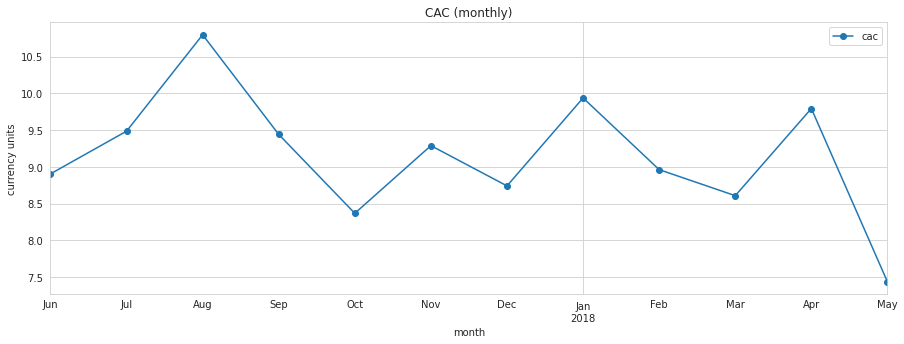

In [105]:
fig, axs = plt.subplots(figsize=(15, 5))
marketing[['cac', 'month']].plot(rot=0, x='month',
        kind='line',
        title='CAC (monthly)', ax=axs, ylabel='currency units', marker="o")
plt.show()

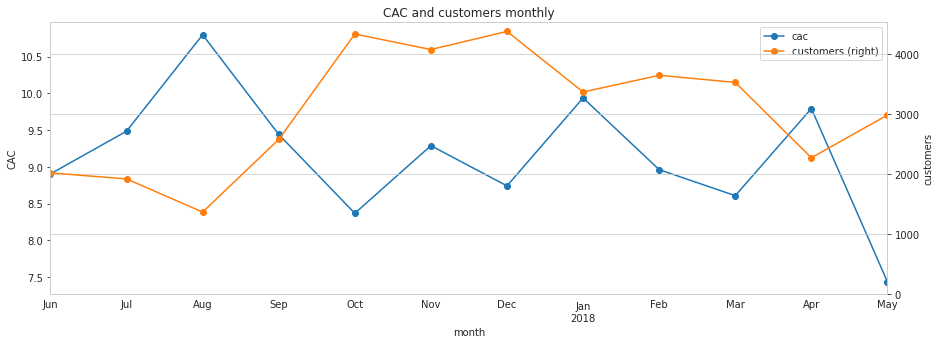

In [106]:
fig, axs = plt.subplots(figsize=(15, 5))

ax = marketing[['cac', 'month']].plot(rot=0, x='month',
        kind='line',
        ax=axs, marker="o")
ax2 = marketing[['customers', 'month']].plot(rot=0, x='month',
        kind='line',
        ax=axs, marker="o", secondary_y = True)

ax.set_xlabel('month')
ax.set_ylabel('CAC')
ax2.set_ylabel('customers')

plt.title('CAC and customers monthly')
plt.ylim(0)
plt.show()

In [107]:
cac_av=round(total_costs/customers['uid'].nunique(),2)
cac_av

9.01

In [108]:
orders_source=orders.groupby(['first_source'])['uid'].nunique().reset_index()
orders_source.columns=['source','customers']

In [109]:
marketing_source=costs.groupby('source_id')['costs'].sum().reset_index()
marketing_source.columns=['source','costs']

In [110]:
cac_source=marketing_source.merge(orders_source, how='left', on=['source'])
cac_source['cac']=cac_source['costs']/cac_source['customers']
cac_source

,source,costs,customers,cac
0,1,20833.27,2899,7.186364
1,2,42806.04,3506,12.209367
2,3,141321.63,10473,13.493901
3,4,61073.60,10296,5.931779
4,5,51757.10,6931,7.467479
5,9,5517.49,1088,5.071222
6,10,5822.49,1329,4.381106


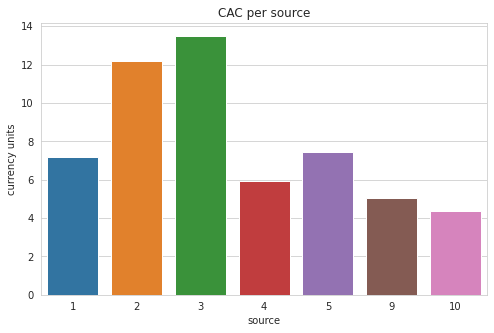

In [111]:
fig, axs = plt.subplots(figsize=(8, 5))
sns.barplot(data=cac_source[['source','cac']], x='source', y='cac')
plt.title('CAC per source')
plt.ylabel('currency units')
plt.show()

In [112]:
orders_month_source=orders.groupby(['first_order','first_source'])['uid'].nunique().reset_index()
orders_month_source.columns=['month','source','customers']

In [113]:
marketing_month_source=costs.groupby(['month','source_id'])['costs'].sum().reset_index()
marketing_month_source.columns=['month','source','costs']

In [114]:
cac_month_source=marketing_month_source.merge(orders_month_source, how='left', on=['month','source'])
cac_month_source['cac']=cac_month_source['costs']/cac_month_source['customers']

In [115]:
cac_month_source_piv=cac_month_source.pivot_table(index='month',columns='source',values='cac')

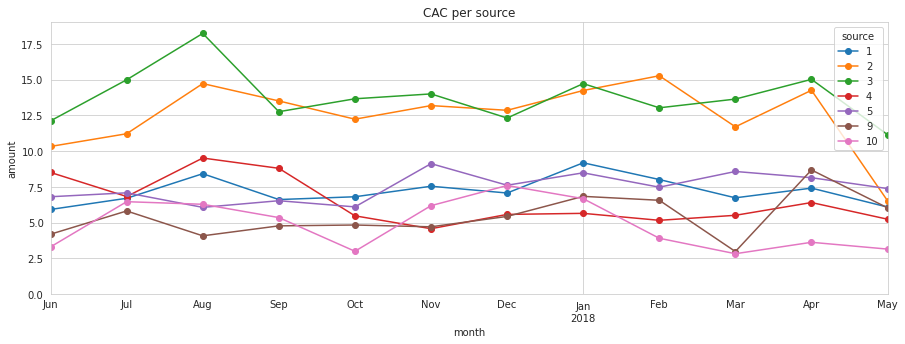

In [116]:
g, axs = plt.subplots(figsize=(15, 5))
cac_month_source_piv.plot.line(ax=axs, title='CAC per source', ylabel='amount',marker='o')
plt.ylim(0)
plt.show()

Sources 4, 9 and 10 have a customer acquisition cost lower than 1, for source 5 CAC equals 1.02, and the most "expensive" ones are source 1 with CAC of 1.16, source 2 with CAC of 1.77 and source 3 with CAC of 2.1

How worthwhile where the investments? (ROMI)

In [117]:
total_revenue
total_costs
total_revenue - total_costs

-77075

In [118]:
romi_av=round(revenue_per_customer/cac_av,2)
romi_av

0.77

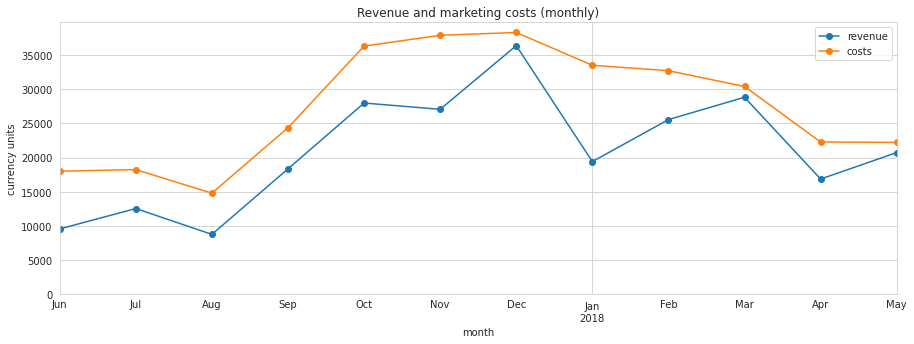

In [119]:
fig, axs = plt.subplots(figsize=(15, 5))
marketing[['month','revenue','costs']].plot(rot=0, x='month',
        kind='line',        
        title='Revenue and marketing costs (monthly)', ax=axs, ylabel='currency units', marker="o")
plt.ylim(0)
plt.show()

In [120]:
cac_source_romi=marketing[['month','cac']]
cac_source_romi.columns=['first_order','cac']
romi=cohorts_ltv.merge(cac_source_romi,on=['first_order'],how='left')
romi.head()

,first_order,order_month,revenue,cohort_size,age,ltv,cac
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414,8.905091
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329,8.905091
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637,8.905091
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671,8.905091
4,2017-06-01,2017-10-01,2068.58,2023,4.0,1.022531,8.905091


In [121]:
romi['romi']=romi['ltv']/romi['cac']
romi_piv = romi.pivot_table(
    index='first_order', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2) 

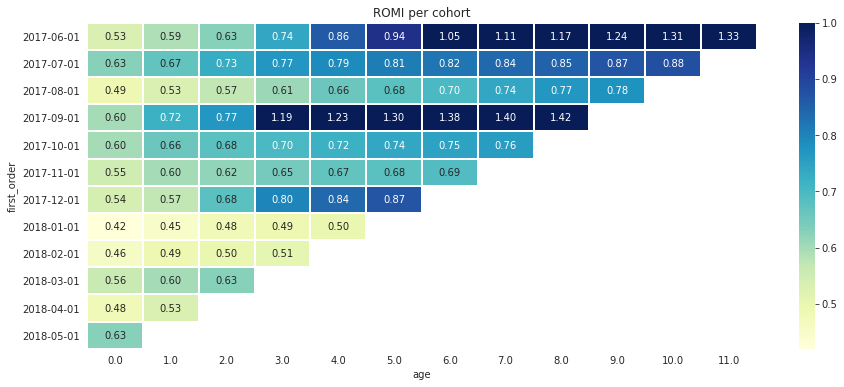

In [122]:
romi_piv.index=romi_piv.index.astype(str)
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(romi_piv, annot=True, fmt='.2f', linewidths=1, vmax=1, linecolor='white', cmap="YlGnBu").set(title ='ROMI per cohort')
plt.show()

In [123]:
orders.head()

,buy_ts,revenue,uid,first_source,order_month,first_order,order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,2017-06-01,2017-06-01,2017-06-01


In [124]:
ltv_per_source=orders.groupby(['first_source'])[['uid','revenue']].agg({'uid':'nunique','revenue':'sum'}).reset_index()
ltv_per_source.columns=['source_id','customers','revenue']
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['customers']

In [125]:
romi_per_source=costs_per_source.merge(ltv_per_source,on=['source_id'])
romi_per_source['cac']=romi_per_source['costs']/romi_per_source['customers']
romi_per_source['romi']=romi_per_source['ltv']/romi_per_source['cac']
romi_per_source

,source_id,costs,customers,revenue,ltv,cac,romi
0,1,20833.27,2899,31090.55,10.724577,7.186364,1.492351
1,2,42806.04,3506,46923.61,13.383802,12.209367,1.096191
2,3,141321.63,10473,54511.24,5.204931,13.493901,0.385725
3,4,61073.60,10296,56696.83,5.506685,5.931779,0.928336
4,5,51757.10,6931,52624.02,7.592558,7.467479,1.016750
5,9,5517.49,1088,5759.40,5.293566,5.071222,1.043844
6,10,5822.49,1329,4450.33,3.348631,4.381106,0.764335


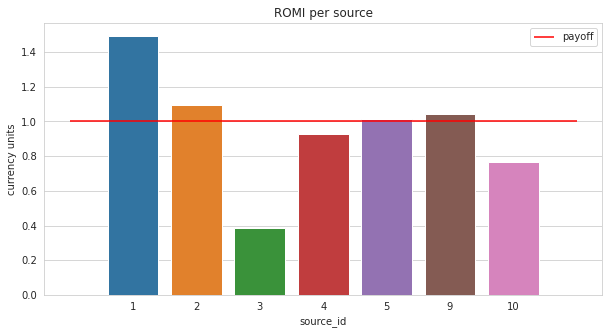

In [126]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.barplot(data=romi_per_source[['source_id', 'romi']], x='source_id', y='romi')
plt.title('ROMI per source')
plt.ylabel('currency units')
plt.hlines(1, -1, 7, color='red', label='payoff')
plt.legend()
plt.show()

From the graph we see that meanwhile only June and September 2017 cohorts returned a marketing investment (June cohort did it on 6th lifetime month and September cohort did it on 3rd lifetime month). As for other cohorts - on average they return the investment on 8th lifetime month. If we take a closer look, we see that on average on 3rd lifetime month users return 71% of the investments and on 6th lifetime month users return 89% of investments.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Use costs for calculate mean cac. After we need:
    
- group costs by month and sum costs
- group orders by first order month using nunique uid
- merge(indexes are true)
- calculate cac
- plot a graph by month
    
For CAC per source we need;
    
- find first source per user in visits
- find  first order month and first order day in orders
- merge tables
- group new table by source id and first order day  and count uid
- merge with costs (left using source id and first order day and  right using source id and costs day. )
- calculate cac per source
- plot a graph by month per source


Do not forget to recalculate ROI.</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Also we can try to plot one heatmap for one source. It will be 7 heatmaps with details. It give us more information about sources.</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>
    
For CAC by sources we need graph by month. Like for costs by sources by month.
    
Second graph should be for mean CAC by month.
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment. V.3.</b> <a class="tocSkip"></a>
    
Unfortunately, I cannot see any changes. :( </div>

Conclusion:

Which platform is more interesting? Obviously, we're talking about desktop - number of active users (around 70%) is higher than that of touch users (around 30%), and eventhough the average revenue is similar for these two platforms, the number of orders is significantly higher for desktop users, and retention rate is a little bit higher, therefore, I would recommend to focus on desktop users.

What about different ad sources? Most popular (in terms of the number of active users) are sources 4, 3, 5, and 2. Highest numbers of orders come from sources 4, 3, 2, and 5. Highest average revenue sources are sources 1 and 2, then go sources 3, 4, and 5. With that, sources with lowest CAC are sources 9 and 10 (which are less interesting in terms of number of orders and average revenue), and sources 4 and 5. Sources 3, 2, and 1 have the highest CAC, although it's still way lower than LTV, therefore, all of the sources are profitable.

I would recommend to continue to put money on marketing for sources 1 and 2 (relaively high number of orders, high average revenue, high number of active users, relatively high retention rate, and CAC is fine). I would recommend to cut some expenses in source 3, since the expenses for this source are the highest, and eventhough the number of active users and number of orders is pretty high, average revenue is not that high, and time of returning the investments is bigger than for other sources). I would also recommend to raise expences for marketing for sources 4 and 5 (low CAC, high nimber of active users, relatively high number of orders and average revenue).

Sources 6 and 7 are not in the expenses list at all, so we don't have enough information to decide what to do with them. Sources 9 and 10 have relatively small number of users, although I would pay more attention to source 9, since the CAC for it is the lowest, and retention rate is the highest.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Very good that you add many details in a final conclusion! Please, do not forget to add changes.</div>

